<!-- ---- -->

# EXPLORATORY DATA ANALYSIS

<!-- ---- -->

IMPORTING LIBRARIES

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('/Users/sarthaksharna/EZTollGuard/data/cleaned_data.csv')

df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,day,month,DayOfWeek,is_Weekend,State_code
0,Bus,A-101,Express,Large,350,120,65,Fraud,6,1,4,0,KA
1,Car,B-102,Regular,Small,120,100,78,Fraud,7,1,5,1,KA
2,Truck,C-103,Regular,Large,350,120,92,Fraud,9,1,0,0,KA
3,Van,B-102,Express,Medium,140,100,60,Fraud,10,1,1,0,KA
4,Sedan,A-101,Regular,Medium,160,100,105,Fraud,11,1,2,0,KA


<!-- ----- -->

ANALYZING THE DISTRIBUTION OF MUERICAL FEATURES

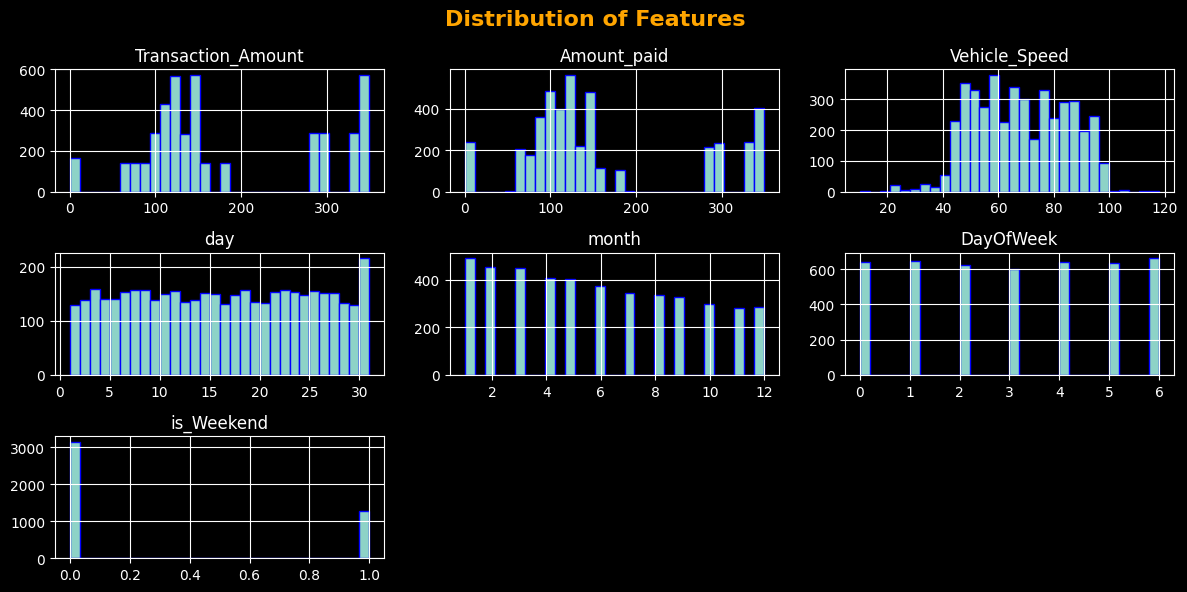

In [38]:
plt.style.use('dark_background')

df.hist(bins = 30, figsize=(12,6) ,edgecolor = 'blue' )
plt.suptitle('Distribution of Features', fontsize=16, color='orange', fontweight='bold')

plt.tight_layout()
plt.show()

<!-- --- -->

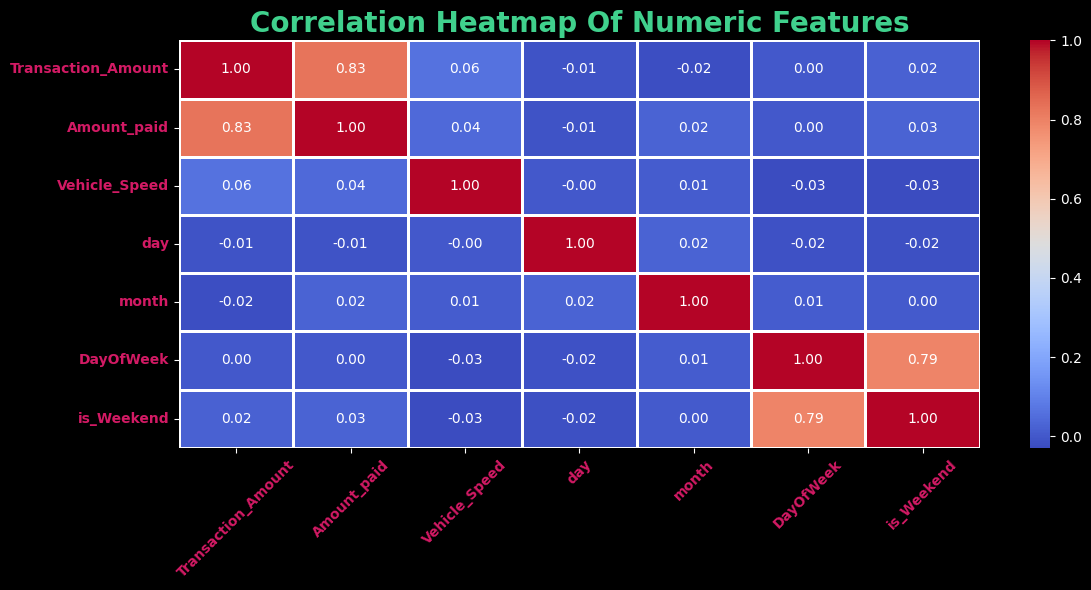

In [39]:
num_cols = df.select_dtypes(exclude='object')

plt.figure(figsize=(12, 6))
sns.heatmap(num_cols.corr() , annot = True , fmt='.2f' , cmap = 'coolwarm', linewidths = 1 , edgecolor = 'blue')
plt.xticks(rotation = 45 , color = '#D21A64' , fontweight = 'bold')
plt.yticks(color = "#D21A64" , fontweight = 'bold')
plt.title("Correlation Heatmap Of Numeric Features", color="#40D18D", fontsize=20, fontweight='heavy')
plt.tight_layout()
plt.show()

In [ ]:
df_1 = df.copy()
df_1['Fraud_indicator'] = df_1['Fraud_indicator'].map({'Fraud' : 1 , 'Not Fraud' : 0})

numCols = df_1.select_dtypes(exclude='object')

print(numCols.corr()['Fraud_indicator'].sort_values(ascending=False))

Fraud_indicator       1.000000
Transaction_Amount    0.065067
Vehicle_Speed         0.014376
day                   0.012707
is_Weekend           -0.002133
DayOfWeek            -0.010377
month                -0.091305
Amount_paid          -0.351434
Name: Fraud_indicator, dtype: float64


<!-- --- -->

###  ✨ UNIVARIATE ANALYSIS 🔍

<!-- ---- -->

Analyzing Fraud Frequency Across Vehicle Types

Objective:
To investigate whether certain types of vehicles (e.g., Buses, Trucks, Cars) are more frequently associated with fraudulent FASTag transactions.

In [40]:
fraud_pct = pd.crosstab(df['Vehicle_Type'], df['Fraud_indicator'] , normalize ='index' )*100
fraud_pct = fraud_pct.round(2).rename(columns={'Fraud' : 'Fraud %' , 'Not Fraud' : 'Not Fraud %'}).sort_values(by = 'Fraud %' , ascending = False)

print("\nPercentage of Fraud per Vehicle Type:\n")

fraud_pct



Percentage of Fraud per Vehicle Type:



Fraud_indicator,Fraud %,Not Fraud %
Vehicle_Type,,
SUV,25.77,74.23
Van,25.42,74.58
Bus,24.76,75.24
Sedan,22.58,77.42
Truck,22.13,77.87
Car,17.16,82.84
Motorcycle,0.00,100.00


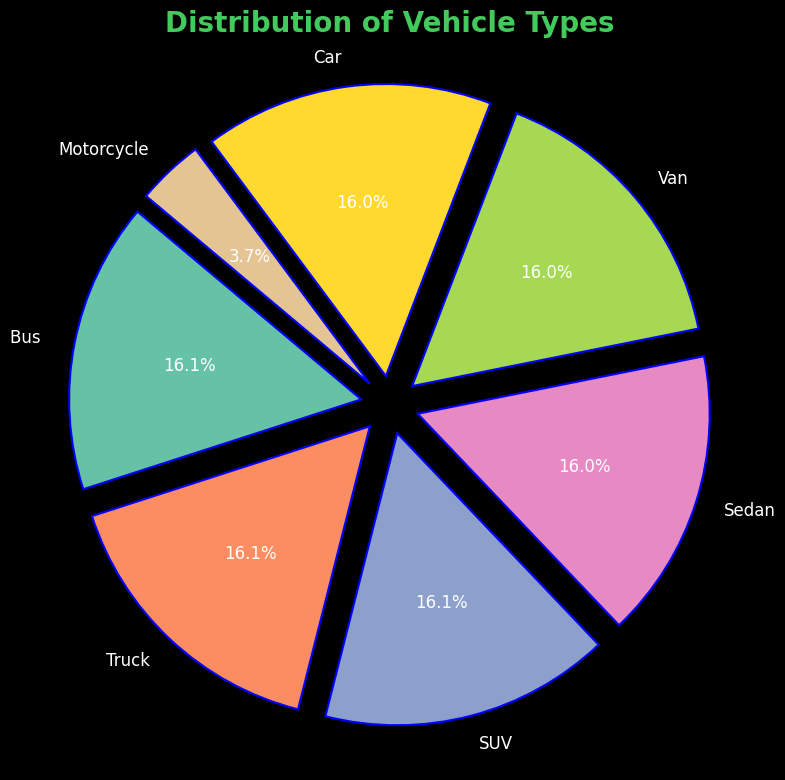

In [41]:
plt.figure(figsize=(8, 8))

vehicle_counts = df['Vehicle_Type'].value_counts()

explode = [0.1] * len(vehicle_counts)  

plt.pie(
    vehicle_counts,
    labels=vehicle_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set2"),
    explode=explode,
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'blue'},
    textprops={'fontsize': 12}
)

plt.title("Distribution of Vehicle Types", color="#43CA5C", fontsize=20, fontweight='heavy')
plt.tight_layout()
plt.show()

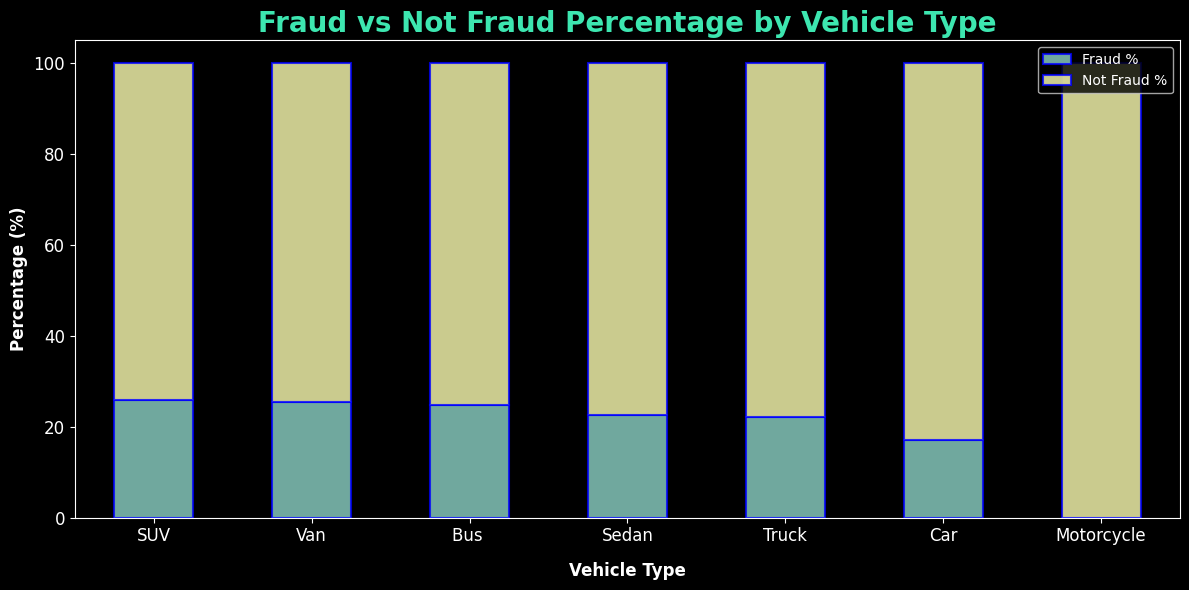

In [42]:
fraud_pct.plot(kind = 'bar' , stacked = True ,figsize=(12,6), edgecolor = 'blue' , linewidth = 1.5, fontsize = 12 , alpha = 0.8)

plt.title("Fraud vs Not Fraud Percentage by Vehicle Type" , color = "#3DE6B0" , fontsize = 20 , fontweight = 'heavy' )
plt.ylabel("Percentage (%)" , fontsize = 12 , fontweight = 'bold')
plt.xlabel("Vehicle Type" , fontsize = 12 , fontweight = 'bold' , labelpad = 12)
plt.xticks(rotation = 0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

INFERENCE :

* SUV'S HAVE THE MOST NUMBER OF FRAUDS RECORDED FOLLOWED BY VANS AND BUS

* MOTORCYLES HAVE NO FRAUD RECOEDED

<!-- ---- -->

Analyzing which Toll Booths are More Prone to Fraud

🔍 Objective : Analyze how fraud is distributed across different TollBoothIDs to identify high-risk toll booths.

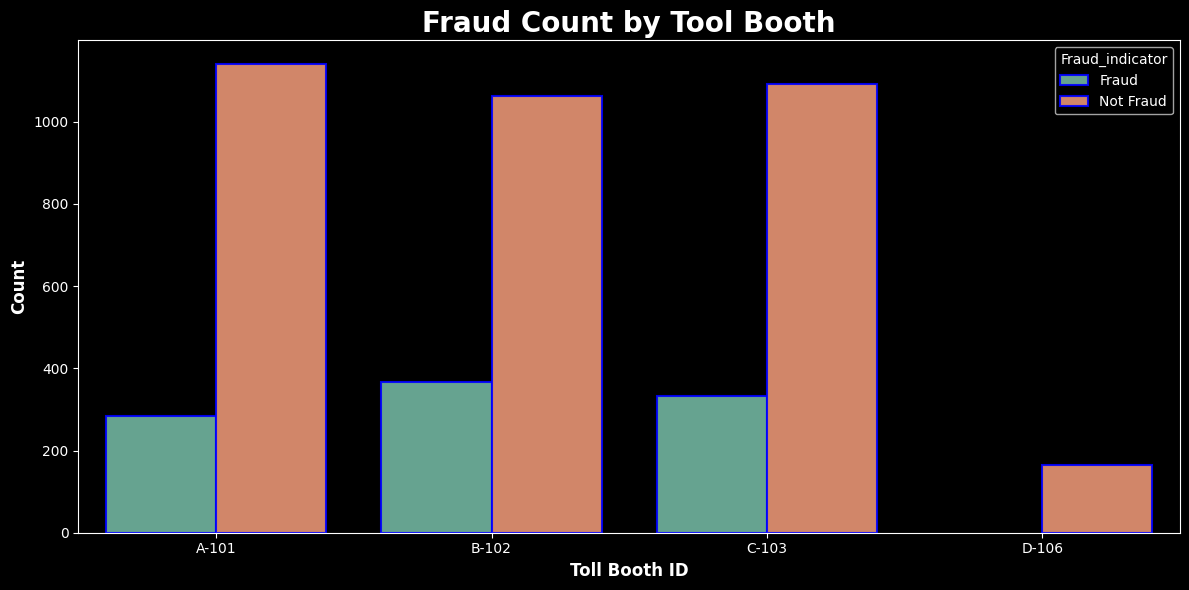

In [43]:
plt.figure(figsize=(12,6))

sns.countplot(data = df , x = 'TollBoothID' , hue = 'Fraud_indicator' , edgecolor = 'blue' , linewidth = 1.5 , alpha = 0.9 , palette='Set2')

plt.title('Fraud Count by Tool Booth' , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy')
plt.xlabel('Toll Booth ID' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Count' , fontsize = 12 , fontweight = 'bold')

plt.tight_layout()
plt.show()

INFERENCE :

* TOLL BOOTH ID B-102 IS MORE PRONE TO FRAUDS FOLLOWED BY C-103 AND A-101

* TOLL BOOTH ID D-106 HAS NO FRAUDS REPORTED

<!-- ------ -->

Is Fraud More Common on Specific Lane Types?

🔍 Objective:
Analyze the distribution of fraud across different Lane Types to identify whether certain lanes are more susceptible to fraudulent activity.

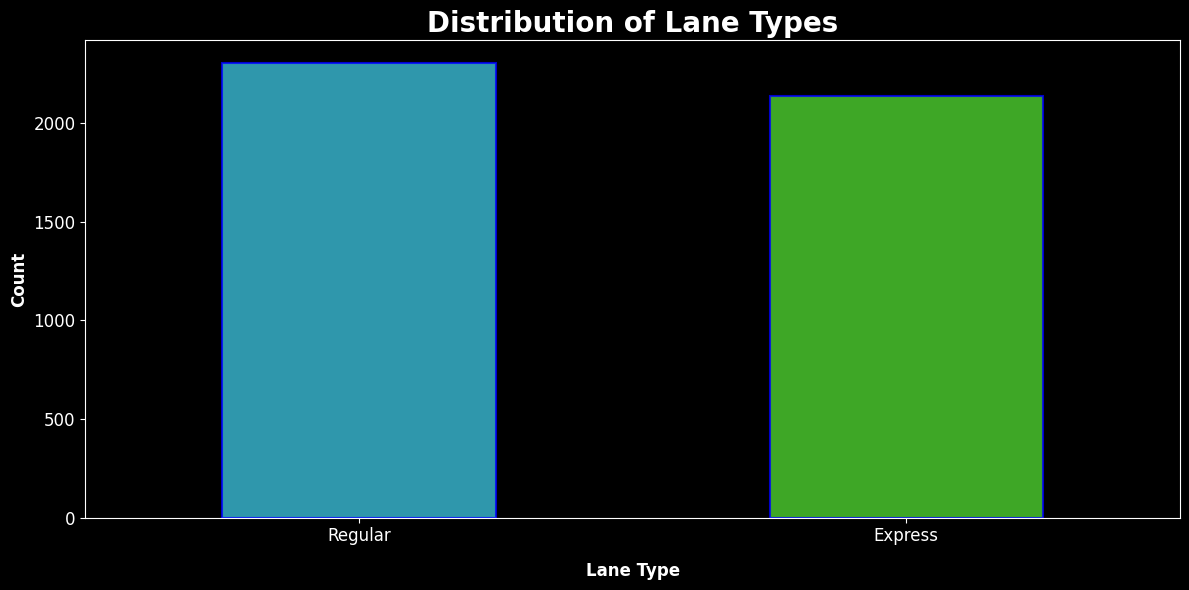

In [44]:
df['Lane_Type'].value_counts().plot(kind = 'bar' , figsize=(12,6), edgecolor = 'blue' , linewidth = 1.5, fontsize = 12 , alpha = 0.8 , color = ["#3BBED8" , "#4ED230"]) 

plt.title("Distribution of Lane Types" , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy' )
plt.ylabel("Count" , fontsize = 12 , fontweight = 'bold')
plt.xlabel("Lane Type" , fontsize = 12 , fontweight = 'bold' , labelpad = 12)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [45]:
ct_lane = pd.crosstab(df['Lane_Type'], df['Fraud_indicator'] , normalize ='index' )*100
ct_lane = ct_lane.round(2).rename(columns={'Fraud' : 'Fraud %' , 'Not Fraud' : 'Not Fraud %'}).sort_values(by = 'Fraud %' , ascending = False)

print("\nPercentage of Fraud per Lane Type:\n")

ct_lane


Percentage of Fraud per Lane Type:



Fraud_indicator,Fraud %,Not Fraud %
Lane_Type,,
Express,22.91,77.09
Regular,21.39,78.61


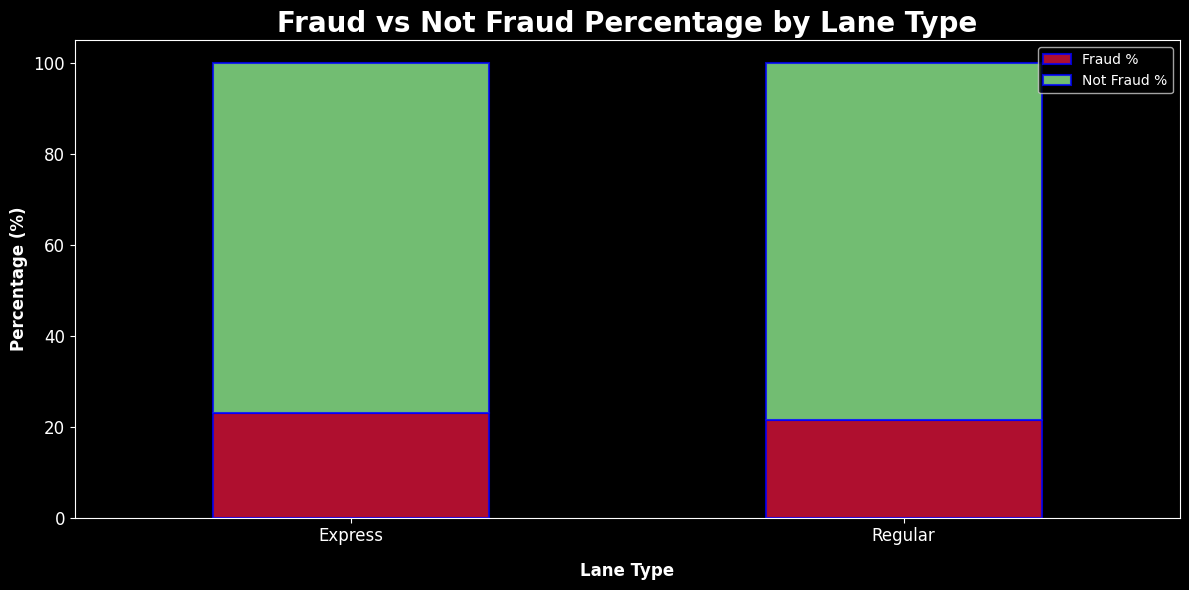

In [46]:
ct_lane.plot(kind = 'bar' , stacked = True ,figsize=(12,6), edgecolor = 'blue' , linewidth = 1.5, fontsize = 12 , alpha = 0.8 , color=['crimson', 'lightgreen'])

plt.title("Fraud vs Not Fraud Percentage by Lane Type" , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy' )
plt.ylabel("Percentage (%)" , fontsize = 12 , fontweight = 'bold')
plt.xlabel("Lane Type" , fontsize = 12 , fontweight = 'bold' , labelpad = 12)
plt.xticks(rotation = 0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

INFERENCE :

* LANE TYPE DOESN'T SEEM TO HAVE MUCH INFLUENCE ON FRAUD PERCENTAGE AS BOTH HAVE ALMOST SAME PERCENTAGE OF FRAUDS

<!-- ---------------- -->

Does Vehicle Speed Show a Pattern in Fraudulent Transactions

🔍 Objective:
Analyze whether fraudulent vehicles tend to move at higher or lower speeds compared to non-fraudulent ones.

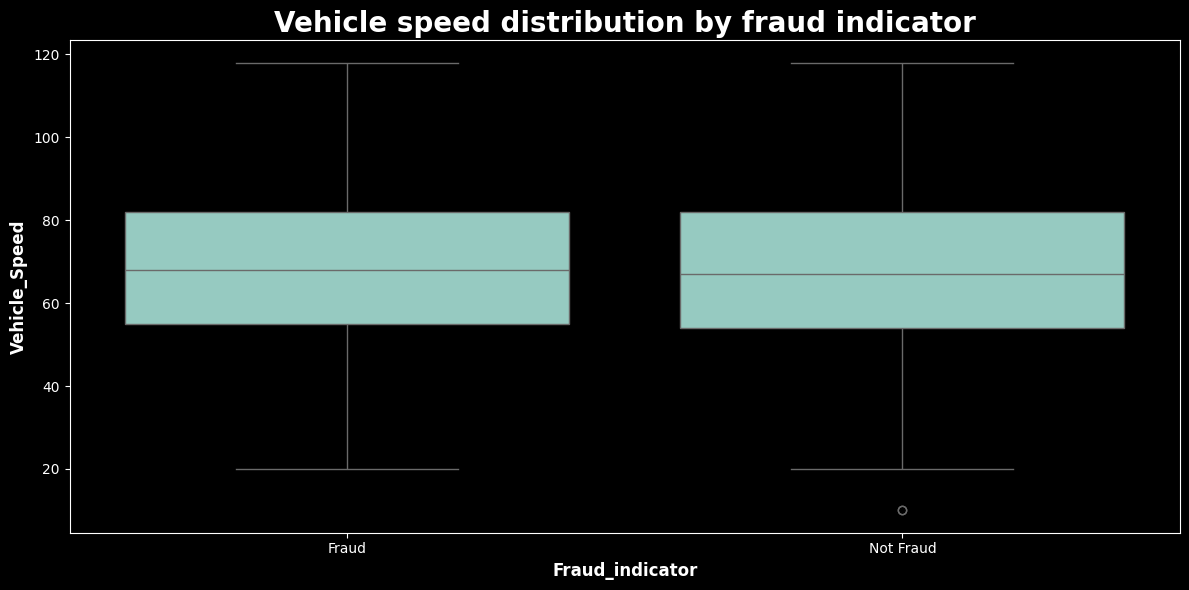

In [47]:
plt.figure(figsize=(12,6))

sns.boxplot(data=df, x='Fraud_indicator', y='Vehicle_Speed')


plt.title('Vehicle speed distribution by fraud indicator' , fontsize = 20 , fontweight = 'heavy')
plt.xlabel('Fraud_indicator' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Vehicle_Speed' , fontsize = 12 , fontweight = 'bold')
plt.tight_layout()
plt.show()

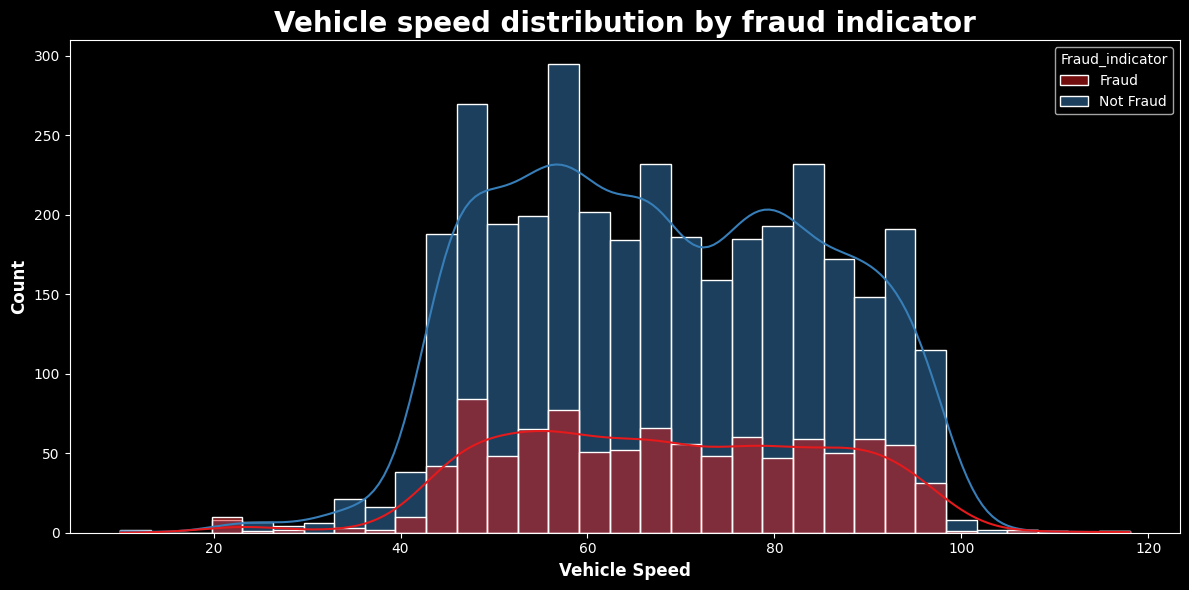

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='Vehicle_Speed', hue='Fraud_indicator', kde=True, palette='Set1', alpha=0.5)

plt.title('Vehicle speed distribution by fraud indicator' , fontsize = 20 , fontweight = 'heavy')
plt.xlabel('Vehicle Speed' , fontsize = 12 , fontweight = 'bold')
plt.ylabel('Count' , fontsize = 12 , fontweight = 'bold')
plt.tight_layout()
plt.show()

INFERENCE :

* According to the data Fraudulent vehicles tend to drive in the mid-speed range (45–70 km/h) and rarely go very fast


<!-- ---- -->

Are Fraudulent Transactions More Common on Weekends?

🔍 Objective:
Analyze if toll frauds happen more frequently on weekends compared to weekdays by examining the is_Weekend feature against Fraud_indicator.

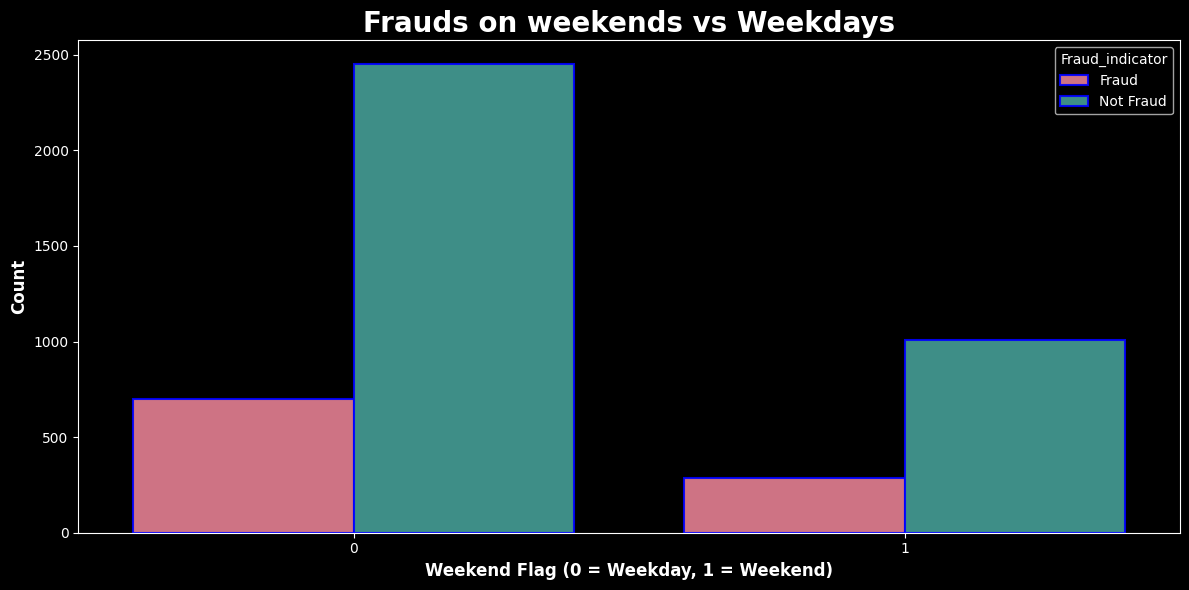

In [49]:
plt.figure(figsize=(12,6))

sns.countplot(data = df , x = 'is_Weekend' , hue = 'Fraud_indicator' , edgecolor = 'blue' , linewidth = 1.5 , alpha = 0.9 , palette='husl')

plt.title('Frauds on weekends vs Weekdays' , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy')
plt.xlabel("Weekend Flag (0 = Weekday, 1 = Weekend)", fontsize=12 , fontweight = 'bold')
plt.ylabel('Count' , fontsize = 12 , fontweight = 'bold')

plt.tight_layout()
plt.show()

INFERENCE :

* More frauds tend to happen in weekdays

<!-- -------- -->

Which States Report Higher Fraud Incidents?

🎯 Objective:
Analyze the distribution of Fraud_indicator across different State_codes to identify regions with higher fraud rates.

Helps authorities focus monitoring or enforcement in high-risk zones.

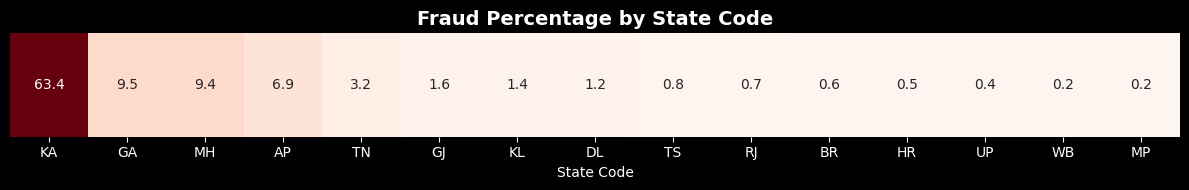

In [50]:
fraud_pct = df[df['Fraud_indicator'] == 'Fraud']['State_code'].value_counts(normalize=True) * 100
fraud_pct = fraud_pct.sort_values(ascending=False).to_frame().T


plt.figure(figsize=(12, 2))
sns.heatmap(fraud_pct, annot=True, cmap='Reds', fmt=".1f", cbar=False)
plt.title("Fraud Percentage by State Code", fontsize=14, fontweight='bold')
plt.yticks([])
plt.xlabel("State Code")
plt.tight_layout()
plt.show()

INFERENCE :

* Kerela has the highest number of fraud incidents followed by Goa and Maharashtra

* Madhya Pradesh has least number of frauds



<!-- ----- -->

Does Fraud Vary by Day of the Week?

🎯 Objective:
Examine if certain days (DayOfWeek) have more frauds, e.g., weekdays vs. weekends or specific days like Mondays or Fridays.
Use this insight to optimize toll operations or flag risky days for automated checks.

In [51]:
ct_dayofweek = pd.crosstab(df['DayOfWeek'], df['Fraud_indicator'] , normalize ='index' )*100

ct_dayofweek =  ct_dayofweek.sort_values(by = 'Fraud' , ascending = False)

ct_dayofweek.rename(columns={'Fraud' : 'Fraud %' , 'Not Fraud' : 'Not Fraud %'} , inplace = True)

ct_dayofweek


Fraud_indicator,Fraud %,Not Fraud %
DayOfWeek,,
1,25.308642,74.691358
2,24.115756,75.884244
6,23.030303,76.969697
5,20.886076,79.113924
0,20.872274,79.127726
4,20.344288,79.655712
3,20.133111,79.866889


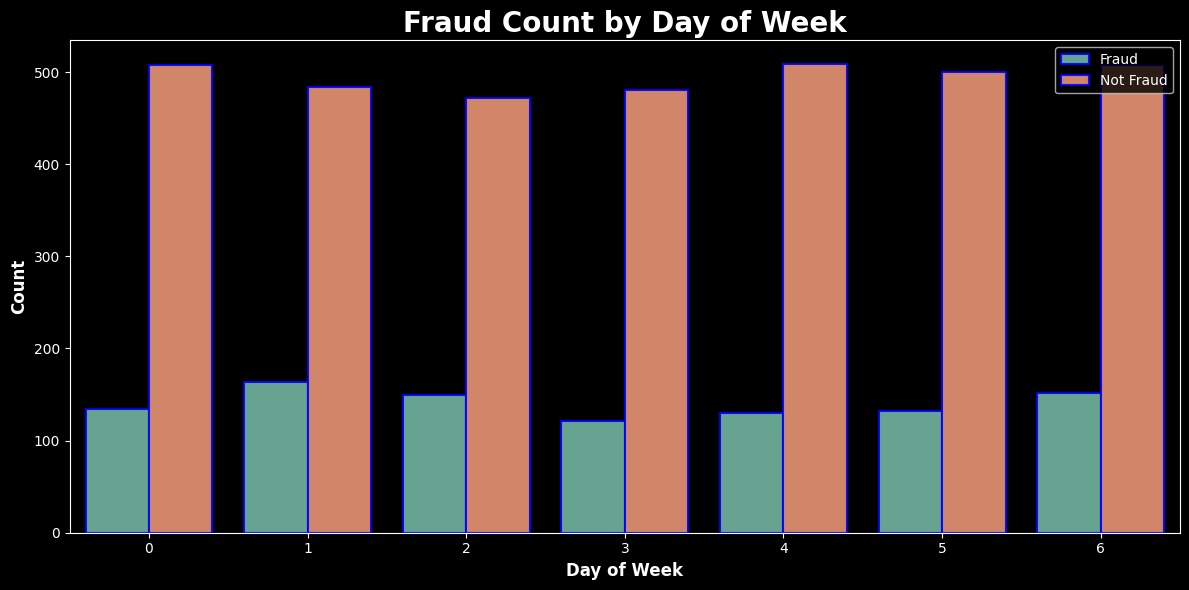

In [52]:
plt.figure(figsize=(12,6))

sns.countplot(data = df , x = 'DayOfWeek' , hue = 'Fraud_indicator' , edgecolor = 'blue' , linewidth = 1.5 , alpha = 0.9 , palette='Set2')

plt.title('Fraud Count by Day of Week' , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy')
plt.xlabel('Day of Week' , fontsize = 12 , fontweight = 'bold' )
plt.ylabel('Count' , fontsize = 12 , fontweight = 'bold')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

INFERENCE :

* Most fraud incidents happen on Tuesday followed by Wednesday and Saturday 

<!-- ---- -->

Does Fastag Fraud Vary by Month ?

🎯 Objective:
Investigate whether the occurrence of Fastag fraud changes across different months.
Identifying high-risk months can help toll operators and enforcement agencies tighten monitoring, deploy preventive checks, and optimize fraud detection systems during periods of elevated risk.

In [53]:
ct_month = pd.crosstab(df['month'], df['Fraud_indicator'], normalize='index') * 100
ct_month = ct_month.round(2)
ct_month = ct_month.sort_values(by='Fraud', ascending=False)
ct_month



Fraud_indicator,Fraud,Not Fraud
month,,
1,27.81,72.19
3,27.33,72.67
2,26.11,73.89
4,25.80,74.20
6,22.25,77.75
5,20.95,79.05
11,19.79,80.21
8,19.76,80.24
9,18.84,81.16


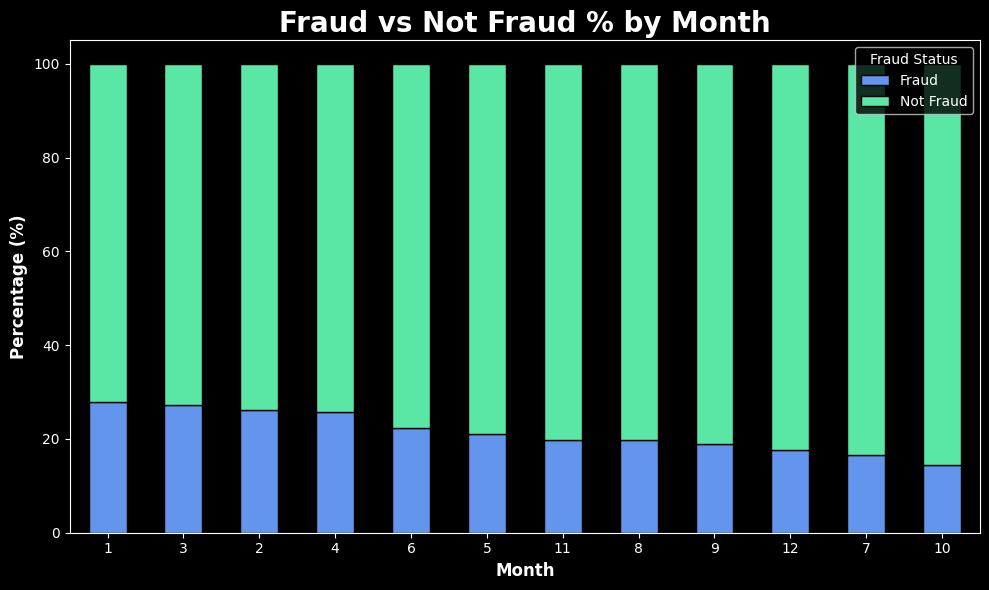

In [54]:
ct_month.plot(kind='bar', 
              stacked=True, 
              figsize=(10, 6), 
              color=('#6495ED' ,  "#5AE6A5") , 
              edgecolor='black')

plt.title("Fraud vs Not Fraud % by Month", fontsize = 20 , fontweight = 'heavy' , color = "#FFFFFF")
plt.xlabel("Month", fontsize=12 , color = "#FFFFFF" , fontweight = 'bold')
plt.ylabel("Percentage (%)", fontsize=12 , color = "#FFFFFF" , fontweight = 'bold')
plt.xticks(rotation=0)
plt.legend(title='Fraud Status')
plt.tight_layout()
plt.show()

INFERENCE :

* January reports the most number of fradulent incidents followed by March

* October reports the least number of frauds

<!-- ----- -->

Does Vehicle Dimensions Affect Fraud

🎯 Objective: Check if certain vehicle types are more likely to be fraudulent.

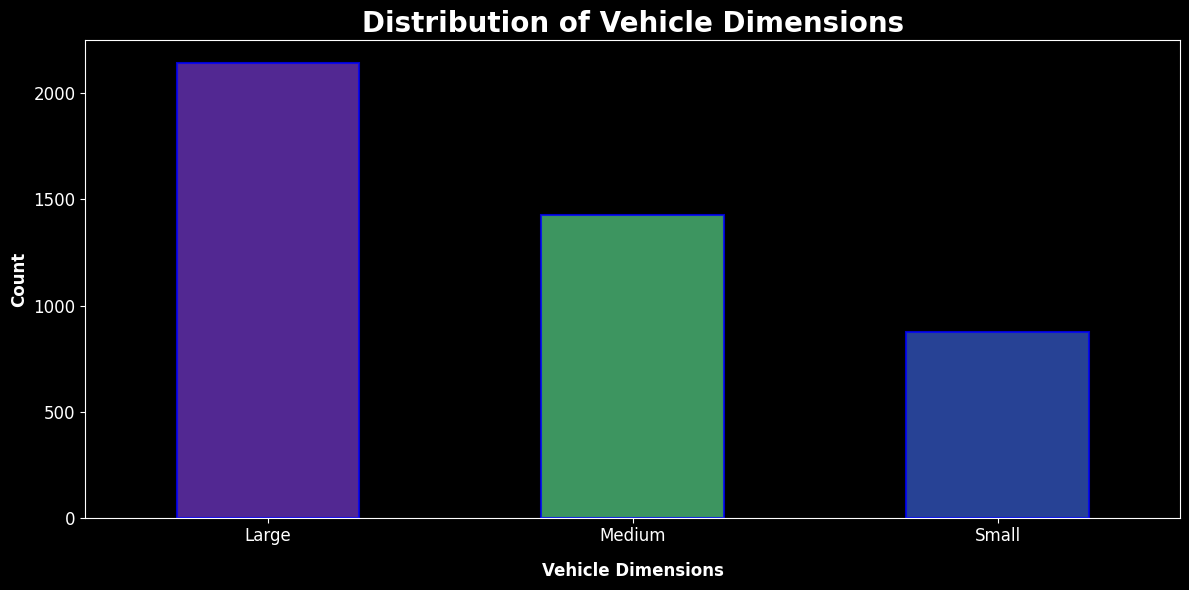

In [55]:
df['Vehicle_Dimensions'].value_counts().plot(kind = 'bar' , figsize=(12,6), edgecolor = 'blue' , linewidth = 1.5, fontsize = 12 , alpha = 0.8 , color = ["#6833B8", "#4DBB79" , "#3253BC"]) 

plt.title("Distribution of Vehicle Dimensions" , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy' )
plt.ylabel("Count" , fontsize = 12 , fontweight = 'bold')
plt.xlabel("Vehicle Dimensions" , fontsize = 12 , fontweight = 'bold' , labelpad = 12)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [56]:
veh_dim = pd.crosstab(df['Vehicle_Dimensions'], df['Fraud_indicator'], normalize='index') * 100
veh_dim = veh_dim.round(2)
veh_dim = veh_dim.sort_values(by='Fraud', ascending=False)
veh_dim

Fraud_indicator,Fraud,Not Fraud
Vehicle_Dimensions,,
Large,24.22,75.78
Medium,24.00,76.00
Small,13.93,86.07


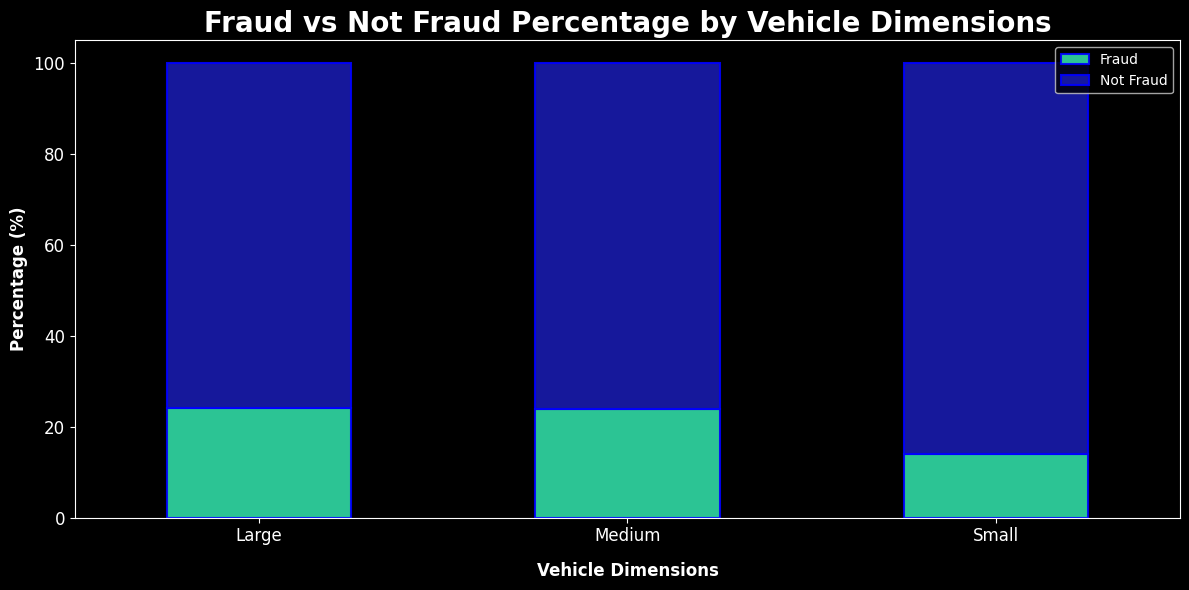

In [57]:
veh_dim.plot(kind = 'bar' , stacked=True , figsize=(12,6), edgecolor = 'blue' , linewidth = 1.5, fontsize = 12 , alpha = 0.9 , color=["#31DBA5" , "#191BAD"])

plt.title("Fraud vs Not Fraud Percentage by Vehicle Dimensions" , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy' )
plt.ylabel("Percentage (%)" , fontsize = 12 , fontweight = 'bold')
plt.xlabel("Vehicle Dimensions" , fontsize = 12 , fontweight = 'bold' , labelpad = 12)
plt.xticks(rotation = 0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

INFERENCE :

* Large and Medium sized vehicles are more indulged in Fastag fraud

<!-- ----- -->

Does Vehicle Type Combined with Lane Type Affect Fraud

🎯 Objective: Check if certain vehicle types using specific lane types (e.g., buses in express lanes) are more likely to be fraudulent.
heplp me with this

<!-- --- -->

### ✨ MULTIVARIATE ANALYSIS  🔍

<!-- --- -->

In [58]:
ct_veh_lane = pd.crosstab([df['Lane_Type'], df['Vehicle_Type']],  df['Fraud_indicator'], normalize='index') * 100

ct_veh_lane = ct_veh_lane.round(2).rename(columns={'Fraud' : 'Fraud %' , 'Not Fraud' : 'Not Fraud %'}).sort_values(by = 'Fraud %' , ascending = False)

ct_veh_lane

Fraud_indicator         Fraud %  Not Fraud %
Lane_Type Vehicle_Type                      
Express   SUV             26.82        73.18
          Van             26.33        73.67
Regular   Bus             25.77        74.23
          SUV             24.72        75.28
          Van             24.51        75.49
Express   Bus             23.74        76.26
Regular   Truck           23.74        76.26
Express   Sedan           23.31        76.69
Regular   Sedan           21.85        78.15
Express   Truck           20.51        79.49
Regular   Car             17.65        82.35
Express   Car             16.67        83.33
Regular   Motorcycle       0.00       100.00

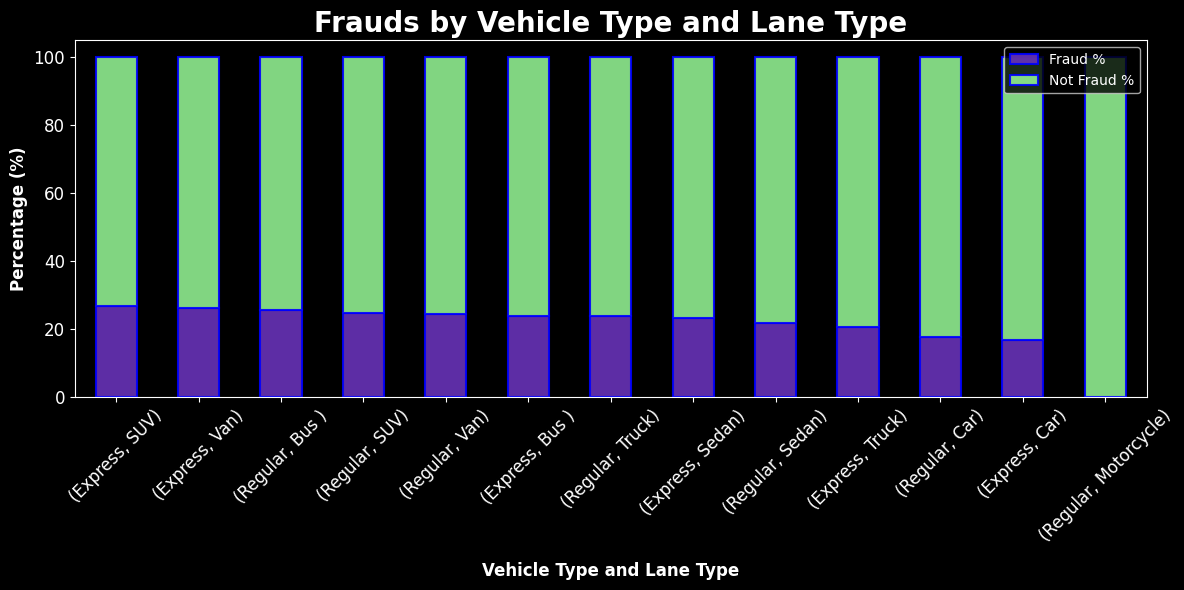

In [59]:
ct_veh_lane.plot(kind = 'bar' , stacked = True ,figsize=(12,6), edgecolor = 'blue' , linewidth = 1.5, fontsize = 12 , alpha = 0.9 , color=['#6833B8', 'lightgreen'])

plt.title('Frauds by Vehicle Type and Lane Type' , fontsize = 20 , fontweight = 'heavy' , color = "#FFFFFF")

plt.xlabel('Vehicle Type and Lane Type' , fontsize = 12 , fontweight = 'bold' , color = "#FFFFFF" , labelpad = 12)
plt.xticks(rotation = 45)

plt.ylabel('Percentage (%)' , fontsize = 12 , fontweight = 'bold' , color = "#FFFFFF")

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

INFERENCE :

* SUV's using Express lane are indulged more in frauds

* Car's using both Express and Regular lanes are least involved in such frauds

<!-- ---- -->

Do Certain Toll Booths Have More Fraud for Specific Vehicle Types?"

🎯 Objective:
Identify if certain TollBoothID and Vehicle_Type combinations are more fraud-prone.

In [60]:
df1 = df.copy()

df1['Booth_VehicleType'] = df1['TollBoothID'] + '|' + df1['Vehicle_Type']

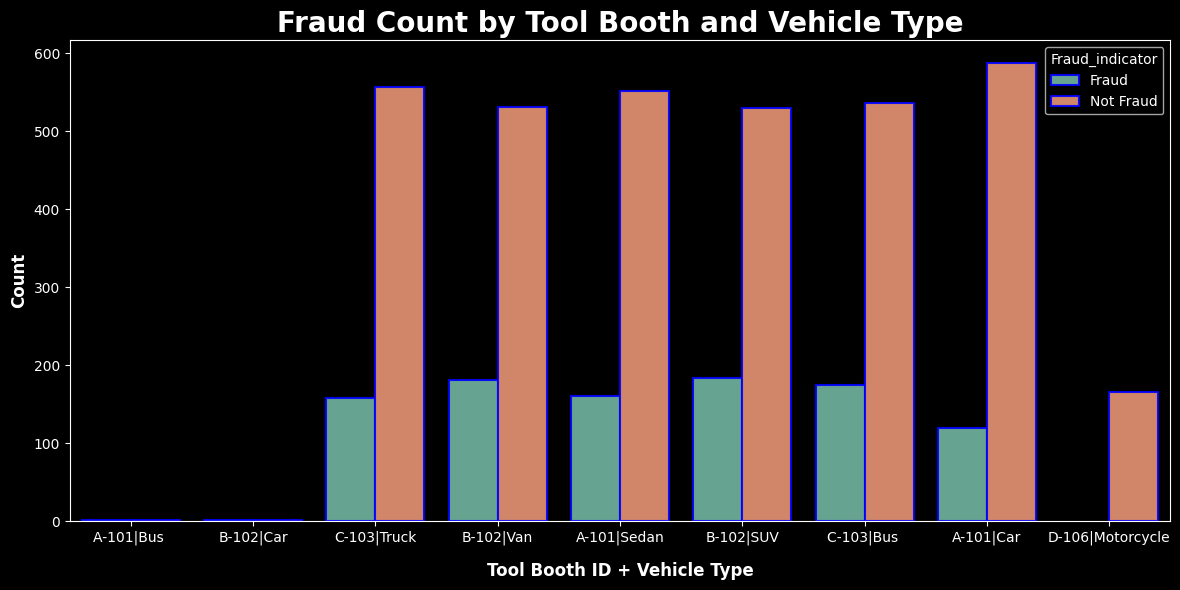

In [61]:
plt.figure(figsize=(12,6))

sns.countplot(data = df1 ,  x = 'Booth_VehicleType' , hue = 'Fraud_indicator' , edgecolor = 'blue' , linewidth = 1.5 , alpha = 0.9 , palette='Set2')

plt.title('Fraud Count by Tool Booth and Vehicle Type' , color = "#FFFFFF" , fontsize = 20 , fontweight = 'heavy')
plt.xlabel('Tool Booth ID + Vehicle Type' , fontsize = 12 , fontweight = 'bold' , color = "#FFFFFF" , labelpad = 12)
plt.ylabel('Count' , fontsize = 12 , fontweight = 'bold' , color = "#FFFFFF")

plt.tight_layout()
plt.show()

INFERNECE :

* Certain combinations, C-103|Truck, B-102|Van, B-102|SUV have higher fraud counts than others.

* Some combinations A-101|Bus, B-102|Car have negligible or zero fraud, suggesting low-risk zones.

* Booths like B-102 and C-103 paired with larger vehicles (Truck, SUV, Bus) consistently show higher fraud incidents.



In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Create bins for clarity
bins = [0, 100, 200, 300, 400, 500, 1000, 5000]
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-1000', '1001-5000']

# Binning Transaction_Amount
df_1['Transaction_Amount_bin'] = pd.cut(df_1['Transaction_Amount'], bins=bins, labels=labels)

# Binning Amount_paid
df_1['Amount_paid_bin'] = pd.cut(df_1['Amount_paid'], bins=bins, labels=labels)


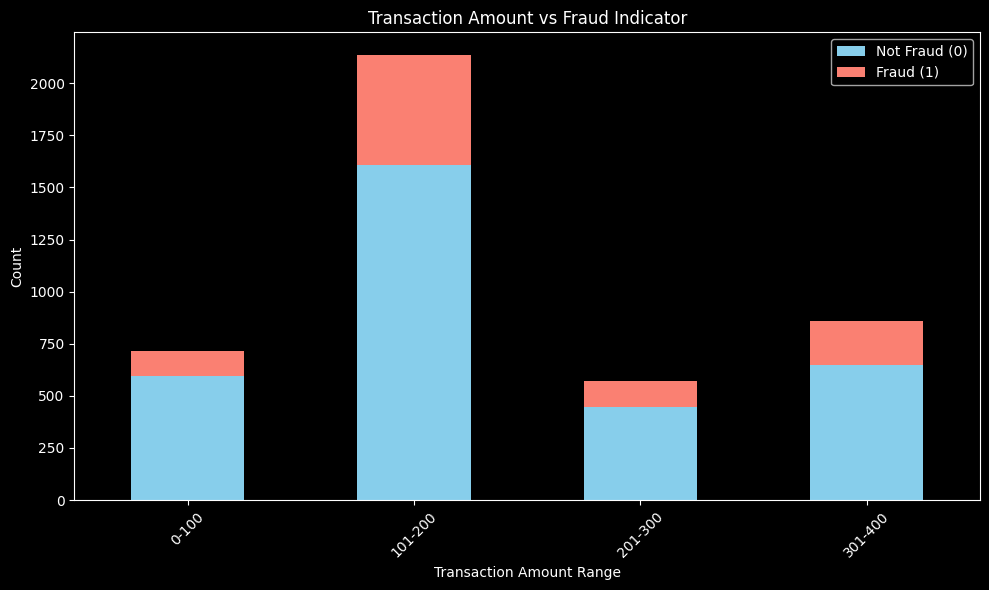

In [74]:
# Count by Fraud Indicator and Amount Bin
ta_counts = pd.crosstab(df_1['Transaction_Amount_bin'], df_1['Fraud_indicator'])

# Plot
ta_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Transaction Amount vs Fraud Indicator')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Count')
plt.legend(['Not Fraud (0)', 'Fraud (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
